<a href="https://colab.research.google.com/github/vinayakpotdar2114/Capstone-Project-4-Netflix-Movies-and-TV-Shows-Clustering/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [118]:
# importing the required libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import matplotlib.cm as cm
import seaborn as sns
%matplotlib inline

import nltk
from nltk.corpus import stopwords

from nltk.stem.snowball import SnowballStemmer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.decomposition import TruncatedSVD

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [119]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [120]:
# Loading the dataset to start working with it.
data=pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/NETFLIX MOVIES AND TV SHOWS CLUSTERING - Potdar Vinayak/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv",encoding='latin1')

# Data Overview

In [121]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [122]:
data.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [123]:
data.describe(include = "all")

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"RaÃºl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


In [124]:
data.shape

(7787, 12)

In [125]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [126]:
# Here we can see that only the release year is of int type.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


# Null Value Analysis and Treatment

In [127]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

Here we can see the features with missing values viz. director, cast, country, date_added and rating

<Figure size 1080x432 with 0 Axes>

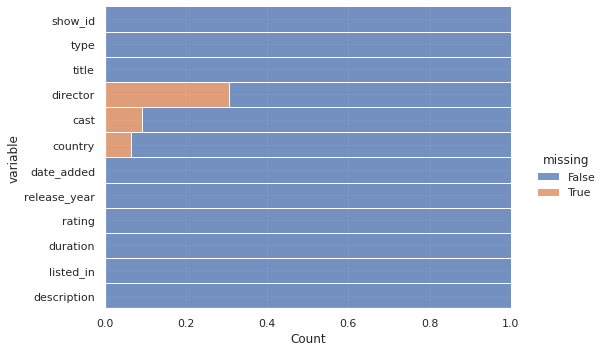

In [128]:
#Plotting Missing Values
plt.figure(figsize=(15,6))
sns.displot(
    data=data.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",aspect= 1.5)

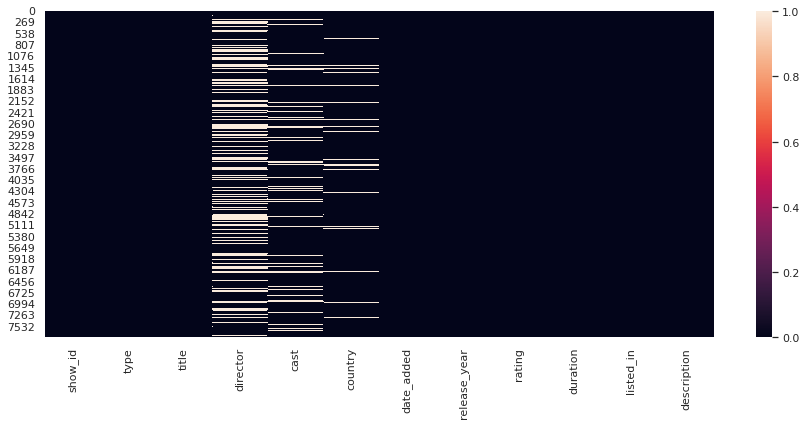

In [129]:
plt.figure( figsize = (15 , 6))
sns.heatmap(data.isna())

We can right away drop director and cast feature from the dataset as they wont be helping in clustering much. Although the cast can help somewhat in clustering, we will be getting many clusters as the  dataset consists of artists from over the world.

In [130]:
data.drop(['director','cast'],axis=1, inplace = True)

We cannot really drop the country feature as we need to analyse the different types of content presented in different countries.

Here we can instead replace the missing values by mode or classify it as others. Let us move ahead with replacing the records with the mode.

In [131]:
# Replacing the missing countries with mode.
data['country'] = data['country'].fillna(data['country'].mode()[0])

The date_added feature has just 10 missing values. This can be ignored, dropped or replaced with mode again. Here we will drop those records.

In [132]:
data.dropna(subset = [ 'date_added' ], inplace = True)

In [133]:
data.shape

(7777, 10)

# Exploratory Data Analysis

In [134]:
# Sorting and extracting date-time from the date column
data['date_added'] = pd.to_datetime(data['date_added'])

# Extracting the month from the date
data['month_name_added']=data['date_added'].dt.month_name()

# Extracting the Year
data['year_added'] = data['date_added'].dt.year

In [135]:
data.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,month_name_added,year_added
0,s1,TV Show,3%,Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,August,2020
1,s2,Movie,7:19,Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,December,2016
2,s3,Movie,23:59,Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",December,2018
3,s4,Movie,9,United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",November,2017
4,s5,Movie,21,United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,January,2020


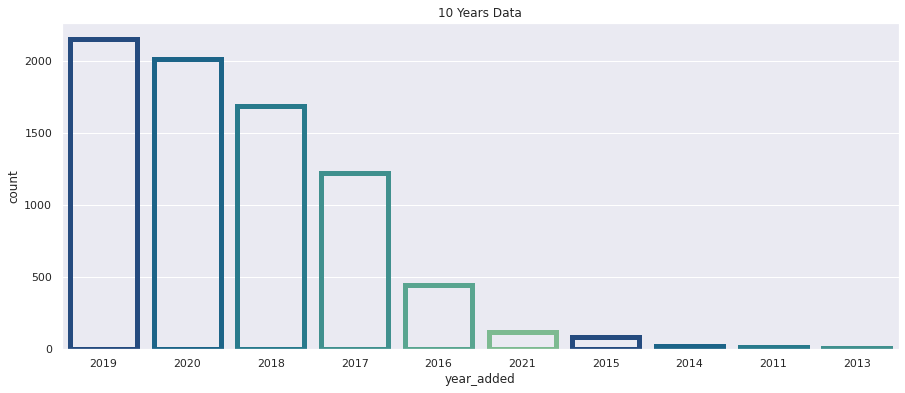

In [136]:
#Top 10 years when maximum movies n TV shows were added
plt.figure(figsize=(15,6))
plt.title('10 Years Data')
sns.countplot(x='year_added',data=data,order=data['year_added'].value_counts().index[:10],facecolor=(0, 0, 0, 0),linewidth=5, edgecolor=sns.color_palette("crest_r"))
plt.show()

The most amount of content added on the platform was in 2019, followed by year 2020.

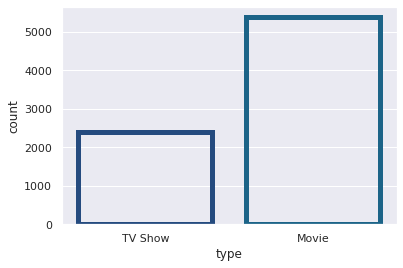

In [137]:
# Let us check what is the distribution of movies and tv shows on the platform.

sns.countplot(x='type', data=data,facecolor=(0, 0, 0, 0),linewidth=5, edgecolor=sns.color_palette("crest_r"))
plt.show()

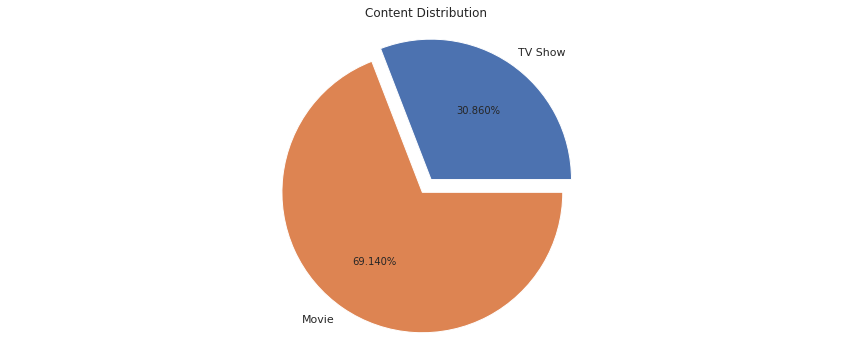

In [138]:
plt.figure(figsize=(15, 6))
labels=['TV Show', 'Movie']
plt.pie(data['type'].value_counts().sort_values(),labels=labels,explode=[0.1,0.01],
        autopct='%1.3f%%', startangle=0)
plt.title('Content Distribution')
plt.axis('equal')
plt.show()

The preface claims that the number TV shows has trippled where as the number of movies is reducing. As per this above illustration, we can see that TV shows are almost half of movies on the platform. The number of TV shows is less than one third of the total content.

The engagement time that TV shows must be bringing might be higher as the TV shows consist of multiple seasons with multiple episodes, where as the movies can only get about 2-3 hours of engagement.



---

Now let us check, what kind of content is being published by each country. This will let us understand the interests of the country and also the trend around the world

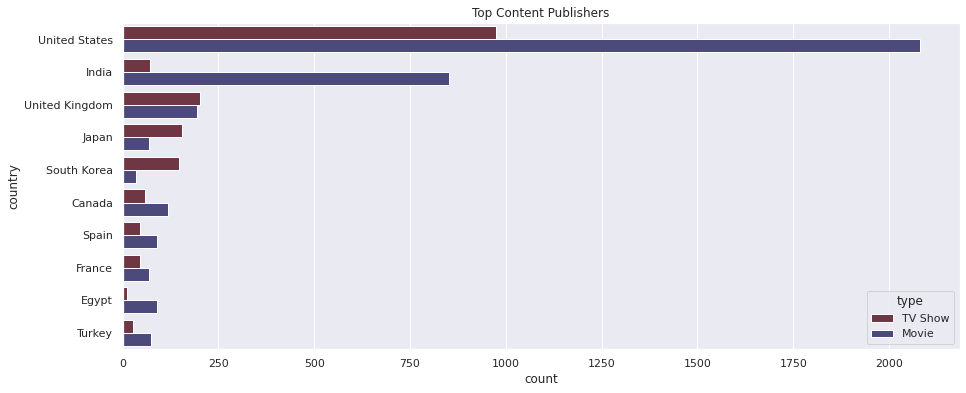

In [139]:
# Getting the publishing distribution of the countries.
fig = plt.figure(figsize=(15,6))
sns.countplot(data = data,y = 'country', order = data["country"].value_counts().index[:10],hue = 'type',palette = 'icefire_r')
plt.title("Top Content Publishers")
plt.show()

**Understanding what type content is available in different countries**

Here we can see that mostly all the countries have been publishing more movies than TV shows. This trend is not followed by UK, Japan and South Korea though.

Let us understand the trend of publishings of the TV shows and Movies over the years now.

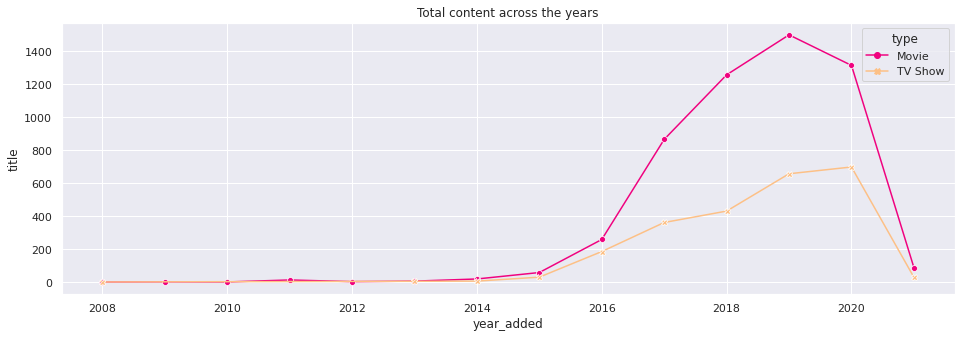

In [140]:
# Movies and TV shows publishing trend
type_year = (data.groupby(['type','year_added'])['title'].size()).reset_index()
fig = plt.figure(figsize=(16,5))
sns.lineplot(data = type_year,x = 'year_added',y = 'title',hue = 'type',style = 'type',palette='Accent_r',markers=True, dashes=False)
plt.title("Total content across the years")
plt.show()

In [141]:
yearly_shows=data[data.type =='TV Show']['release_year'].value_counts().sort_index(ascending=False).head(15)
yearly_movies=data[data.type =='Movie']['release_year'].value_counts().sort_index(ascending=False).head(15)

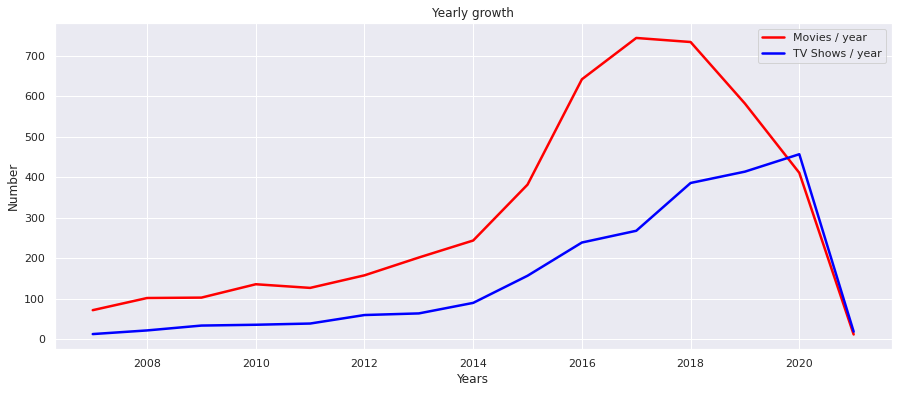

In [142]:
yearly_movies.plot(figsize=(15, 6), linewidth=2.5, color='red',label="Movies / year")
yearly_shows.plot(figsize=(15, 6), linewidth=2.5, color='blue',label="TV Shows / year")
plt.xlabel("Years")
plt.ylabel("Number")
plt.legend()
plt.title("Yearly growth");

**Is Netflix has increasingly focusing on TV rather than movies in recent years.**

We can clearly see that post 2015 the publishings started increasing exponentially. More number of publishings are of Movies than TV shows here again. 

To answer the question asked above, yes Netflix is increasing its focus towards Tv shows and a gradual dip can be observed in the movie shows. The number of movies published, still remains higher as compared to TV shows as of now.

# Hypothesis: Movies Create more engagement than TV shows.

In order to understand which category is responsible for creating more engagement of platform, we need to understand the 'duration' feature.

Here we have two types of values; for movies we have duration in minutes and for TV shows we have Seasons. Seasons cannot be a measure of time so we need to convert this into minutes.


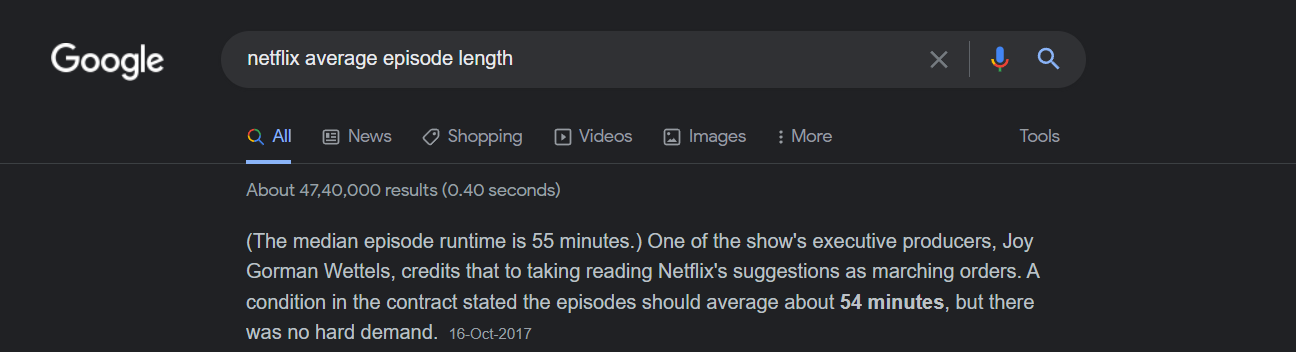

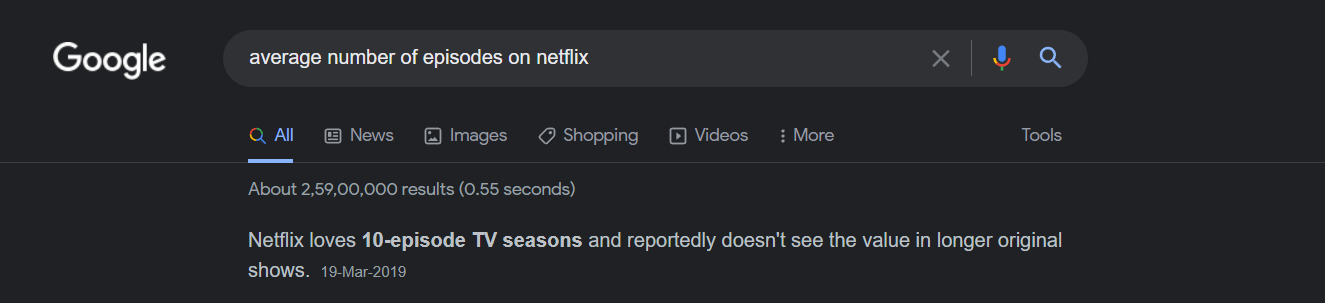

Considering that every TV show has 10 Episodes and each episode has 55 minutes, it is 550 minutes per season.

**Note**-- All this data is not concrete and cannot be trusted as it is being provided by random blogs on google.

Let us convert each duration with season to minutes.

In [143]:
# Creating two different data-frames for Tv shows and Movies.

tv_shows_data = data[data.type == 'TV Show'].copy()
movie_data = data[data.type == 'Movie'].copy()

In [144]:
tv_shows_data['dur_min']= tv_shows_data['duration'].str.split(' ').str[0]

In [145]:
tv_shows_data['dur_min'] = tv_shows_data['dur_min'].astype(int)

In [146]:
tv_shows_data['dur_min']= tv_shows_data['dur_min']*550

In [147]:
movie_data['duration'] = movie_data['duration'].str.split(' ').str[0]

In [148]:
movie_data['duration'] = movie_data['duration'].astype(int)

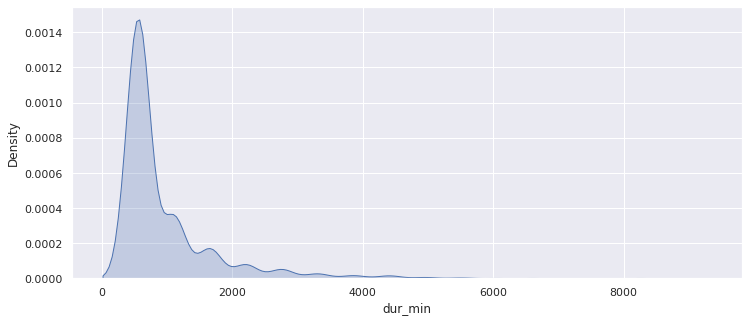

In [149]:
sns.set(style="darkgrid")
plt.figure(figsize = (12,5))
sns.kdeplot(data = tv_shows_data.dur_min , shade=True)

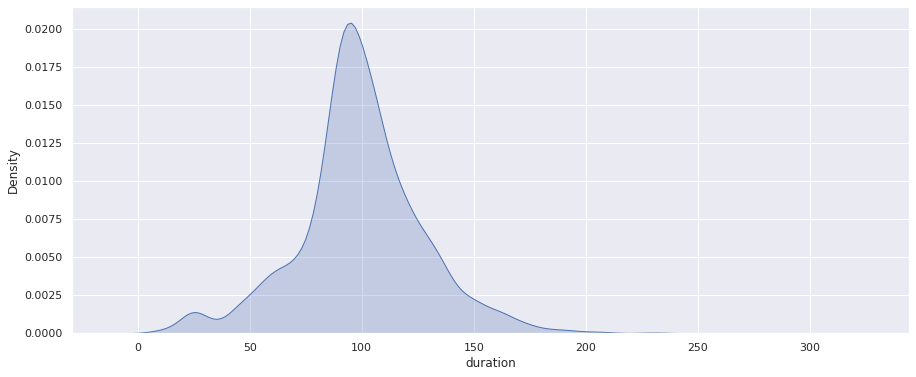

In [150]:
sns.set(style="darkgrid")
plt.figure(figsize = (15,6))
sns.kdeplot(data = movie_data.duration , shade=True)
# sns.kdeplot(data = tv_shows_data.dur_min , shade=True)
# plt.legend()

Here we can clearly see the duration distribution of Movies and TV shows, We can safely say that the **null hypothesis is rejected.**



---
What are the different categories in the dataset. Let us find out.


In [151]:
# Plotting the Category Distribution

categories = ", ".join(data['listed_in']).split(", ")
unique_categories = set(categories)

category_count = {}
for cat in set(categories):
  category_count[cat] = categories.count(cat)

sorted_category_count = sorted(category_count.items(), key=lambda x: x[1], reverse = True)
sorted_category_count[:10]

[('International Movies', 2437),
 ('Dramas', 2106),
 ('Comedies', 1471),
 ('International TV Shows', 1198),
 ('Documentaries', 786),
 ('Action & Adventure', 721),
 ('TV Dramas', 703),
 ('Independent Movies', 673),
 ('Children & Family Movies', 532),
 ('Romantic Movies', 531)]

In [152]:
df = pd.DataFrame(sorted_category_count[:10], columns=['Category', 'Count'])

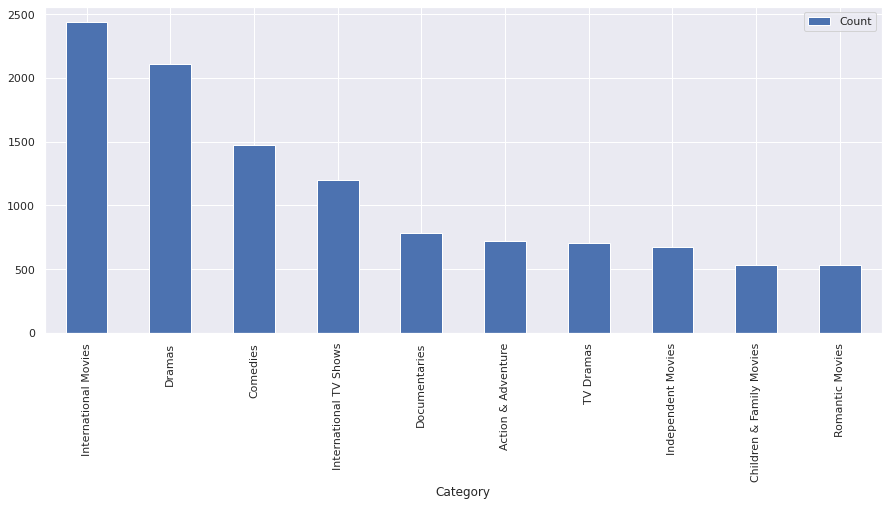

In [153]:
# Plotting top 10 category wise distribution of the shows and movies.
df.plot(figsize=(15, 6),x ='Category', y='Count', kind = 'bar')
plt.show()

International Movies, Dramas and Comedies turn out to be the major generes of the platform data, as they must be catering to a wide range of viewers.

**Lets check the trends of publishing content on the platform.**

* Month wise publishing of content on platform.
* Ratings of the movies and shows that are published
* Distrubution of the ratings of the content.

In [154]:
# Plotting the month wise publishing distribution.

month=data['month_name_added'].value_counts().reset_index()
month.rename(columns={'index': 'Month'}, inplace=True)
month.rename(columns={'month_name_added': 'Count'}, inplace=True)
month.head(12)

,Month,Count
0,December,833
1,October,785
2,January,757
3,November,738
4,March,669
5,September,619
6,August,618
7,April,601
8,July,600
9,May,543


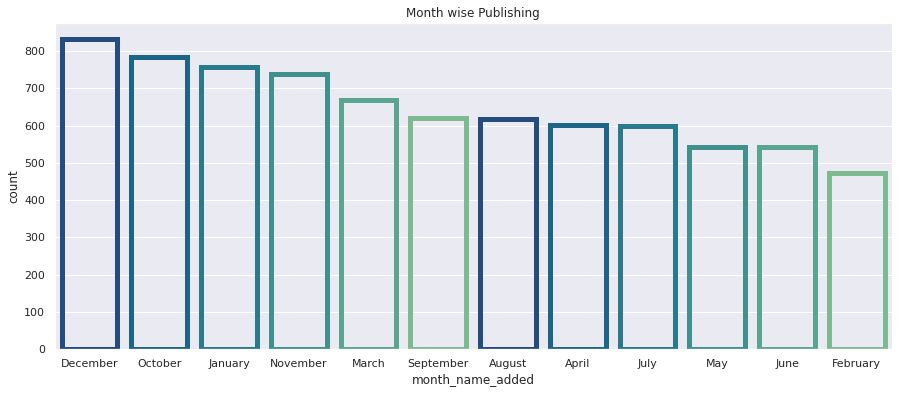

In [155]:
plt.figure(figsize=(15,6))
#data['month_name_added'] = pd.to_datetime(data['month_name_added'])
plt.title('Month wise Publishing')
sns.countplot(x='month_name_added',data=data,order=data['month_name_added'].value_counts().index[:12],facecolor=(0, 0, 0, 0),linewidth=5, edgecolor=sns.color_palette("crest_r"))
plt.show()

By looking at the above chart we can see that the most of the content is published in the month of December. This is followed by October, January and November. These are the months where we have holidays and new year when people are mostly at home and chilling. The mid part of the year has consistent but low content publishings.

In [156]:
data.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,month_name_added,year_added
0,s1,TV Show,3%,Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,August,2020
1,s2,Movie,7:19,Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,December,2016
2,s3,Movie,23:59,Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",December,2018
3,s4,Movie,9,United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",November,2017
4,s5,Movie,21,United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,January,2020


In [157]:
# getting the unique ratings that the shows and movies have!

data['rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

These are all the different ratings that the shows and movies are given. Let us understand now, what is the distribution of these ratings.

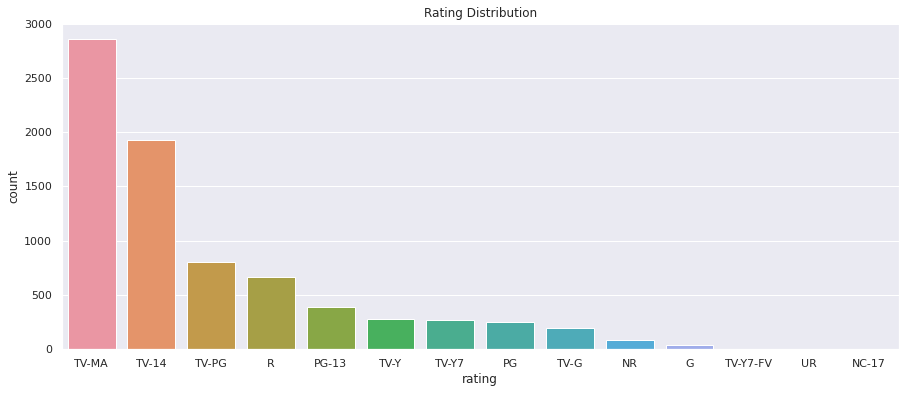

In [158]:
plt.figure(figsize=(15,6))
plt.title('Rating Distribution')
sns.countplot(x='rating',data=data,order=data['rating'].value_counts().index[:15])
plt.show()

The overall content rating distribution shows us that the **TV-MA** is the most awarded rating to the content i.e. most of the content is unsuitable for people under the age of 17. It is for mature audience only (adults).


* Let us find out if the same stands for TV-Shows and Movies separately.

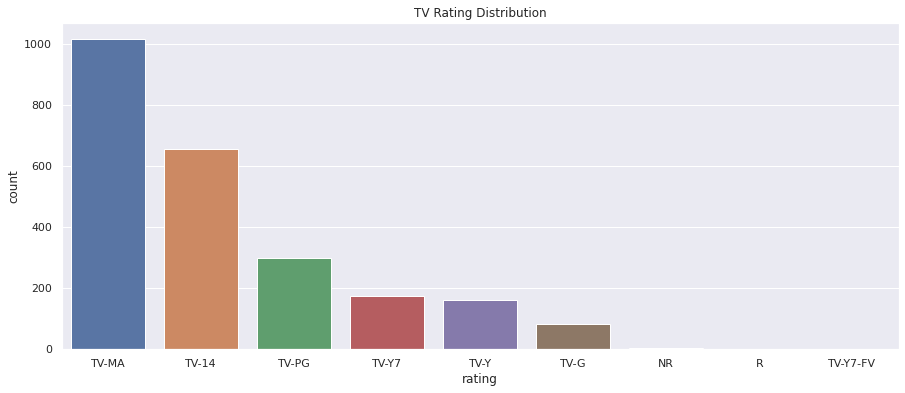

In [159]:
# Ploting the rating distribution for TV shows, using the tv_shows_data that we created earlier.
plt.figure(figsize=(15,6))
plt.title('TV Rating Distribution')
sns.countplot(x='rating',data=tv_shows_data,order=tv_shows_data['rating'].value_counts().index[:15])
plt.show()

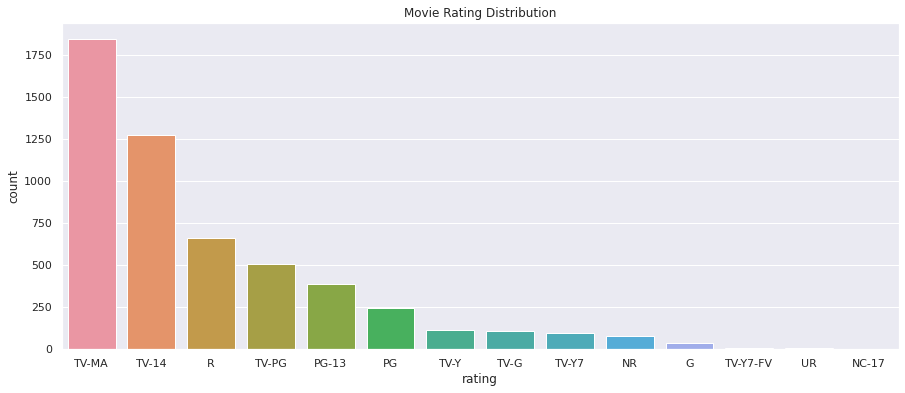

In [160]:
# Ploting the rating distribution with for Movies, using the movie_data that we created earlier.
plt.figure(figsize=(15,6))
plt.title('Movie Rating Distribution')
sns.countplot(x='rating',data=movie_data,order=movie_data['rating'].value_counts().index[:15])
plt.show()

The ratings for both type of contents are the same, where the majority is rated as **TV-MA** i.e. for **Mature Audience Only.** 

* Now that we know how and what of the data, we can move ahead with clustering the similar shows and movies.

* The challenge provided here, suggests that we should be clustering using the text based features.

In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           7777 non-null   object        
 1   type              7777 non-null   object        
 2   title             7777 non-null   object        
 3   country           7777 non-null   object        
 4   date_added        7777 non-null   datetime64[ns]
 5   release_year      7777 non-null   int64         
 6   rating            7770 non-null   object        
 7   duration          7777 non-null   object        
 8   listed_in         7777 non-null   object        
 9   description       7777 non-null   object        
 10  month_name_added  7777 non-null   object        
 11  year_added        7777 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 1.0+ MB


# Data Preprocessing / Feature Engineering

* We will be cleaning the main features that have the text based data for NLP.

Lets not play with the data that we have prepared till now. We shall create a copy for a working dataset.

In [162]:
# Creating a working dataset.
w_data= data.copy()

In [163]:
def remove_punctuation(texts):
    import string
    translator = str.maketrans('', '', string.punctuation)
    return texts.translate(translator)

In [164]:
w_data['description'] = w_data['description'].apply(remove_punctuation)
w_data['title'] = w_data['title'].apply(remove_punctuation)
w_data['listed_in'] = w_data['listed_in'].apply(remove_punctuation)
#w_data['rating'] = w_data['rating'].apply(remove_punctuation)

In [165]:
# Removing Stop Words
nltk.download('stopwords')
sw=stopwords.words('english')
STOPWORDS = set(stopwords.words('english'))
# Downloading the stop words from nltk library and storing them

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [166]:
# Creating a function to remove stop words from the Texts.
def stopword(texts):
    # Lowercasing the words and removing stop words.
    texts = [word.lower() for word in texts.split() if word.lower() not in sw]
    return " ".join(texts)

In [167]:
# Removing the stop words from the texts.
w_data['title'] = w_data['title'].apply(stopword)
w_data['listed_in'] = w_data['listed_in'].apply(stopword)
w_data['description'] = w_data['description'].apply(stopword)

In [168]:
# Stemming Operation
# This will represent all the words as their root form, but may not really be a English Verbal Word eg. (family == famili)
stemmer = SnowballStemmer("english")

def stemming(texts):    
    texts = [stemmer.stem(word) for word in texts.split()]
    return " ".join(texts) 

In [169]:
# Stemming the Texts.
w_data['title'] = w_data['title'].apply(stemming)
w_data['listed_in'] = w_data['listed_in'].apply(stemming)
w_data['description'] = w_data['description'].apply(stemming)

In [170]:
movie_data.head(1)

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,month_name_added,year_added
1,s2,Movie,7:19,Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,December,2016


In [171]:
tv_shows_data.head(1)

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,month_name_added,year_added,dur_min
0,s1,TV Show,3%,Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,August,2020,2200


In [172]:
w_data.head(1)

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,month_name_added,year_added
0,s1,TV Show,3,Brazil,2020-08-14,2020,TV-MA,4 Seasons,intern tv show tv drama tv scifi fantasi,futur elit inhabit island paradis far crowd sl...,August,2020


In [173]:
movie_data.drop(columns=['show_id', 'title', 'date_added', 'description'],axis=1,inplace=True)

tv_shows_data.drop(columns=['show_id', 'title', 'date_added',
          'description'],axis=1,inplace=True)

new_data = w_data.drop(columns=['show_id', 'title', 'date_added', 'description'],axis=1)
# movie_df
new_data.head()

,type,country,release_year,rating,duration,listed_in,month_name_added,year_added
0,TV Show,Brazil,2020,TV-MA,4 Seasons,intern tv show tv drama tv scifi fantasi,August,2020
1,Movie,Mexico,2016,TV-MA,93 min,drama intern movi,December,2016
2,Movie,Singapore,2011,R,78 min,horror movi intern movi,December,2018
3,Movie,United States,2009,PG-13,80 min,action adventur independ movi scifi fantasi,November,2017
4,Movie,United States,2008,PG-13,123 min,drama,January,2020


In [174]:
#Converting the Labels to Numeric form for the Elbow method.
le = LabelEncoder()
new_data["type"] = le.fit_transform(new_data["type"])
new_data["country"] = le.fit_transform(new_data["country"])
new_data['rating'] = le.fit_transform(new_data['rating'])
new_data['listed_in'] = le.fit_transform(new_data['listed_in'])

In [175]:
# Let us combine the two text based features which will help in clustering.
# This will be the dataset that will be used for the final clustering after the vectorization is done.
text_data = w_data['listed_in'] + w_data['description']
text_data

0       intern tv show tv drama tv scifi fantasifutur ...
1       drama intern movidevast earthquak hit mexico c...
2       horror movi intern moviarmi recruit found dead...
3       action adventur independ movi scifi fantasipos...
4       dramabrilliant group student becom cardcount e...
                              ...                        
7782    drama intern movilebanon civil war depriv zozo...
7783    drama intern movi music musicscrappi poor boy ...
7784    documentari intern movi music musicdocumentari...
7785    intern tv show realiti tvdessert wizard adrian...
7786    documentari music musicdocumentari delv mystiq...
Length: 7777, dtype: object

Now that we have the textual data with us, let us try to extract some meaning out of it. Before doing that, we need to vectorise the data.

In [176]:
# Vectorization using Tfidf Vectorizer
vectorizer =TfidfVectorizer(stop_words=STOPWORDS,max_features=1000)
vectorized_text=vectorizer.fit_transform(text_data)
print(vectorizer.get_feature_names())

['1970s', 'abandon', 'abduct', 'abil', 'abus', 'academi', 'accept', 'accid', 'accident', 'account', 'accus', 'across', 'act', 'action', 'activist', 'actor', 'actress', 'adapt', 'addict', 'adopt', 'adult', 'adventur', 'affair', 'affect', 'africa', 'african', 'age', 'agent', 'agre', 'alien', 'alli', 'along', 'also', 'alter', 'alway', 'ambiti', 'america', 'american', 'amid', 'among', 'ancient', 'angel', 'anim', 'anoth', 'answer', 'anyth', 'apart', 'appear', 'arm', 'armi', 'around', 'arrang', 'arriv', 'art', 'artist', 'ask', 'aspir', 'assassin', 'assist', 'athlet', 'attack', 'attempt', 'attend', 'attract', 'author', 'aveng', 'avoid', 'await', 'away', 'awkward', 'babi', 'bachelor', 'back', 'bad', 'band', 'bank', 'base', 'battl', 'bear', 'beauti', 'becom', 'befriend', 'begin', 'behind', 'believ', 'belov', 'best', 'betray', 'better', 'beyond', 'big', 'biggest', 'bill', 'birth', 'birthday', 'black', 'bodi', 'bond', 'book', 'boss', 'boy', 'boyfriend', 'brave', 'break', 'bring', 'british', 'brot

In [177]:
vidf=vectorizer.idf_
vidf

array([6.59175868, 6.70095798, 6.62685   , 6.59175868, 6.24548245,
       6.74017869, 6.59175868, 5.8986115 , 6.78100068, 6.70095798,
       6.40370645, 5.86470995, 6.15239202, 3.15888445, 6.3481366 ,
       5.97007047, 6.74017869, 6.66321765, 6.62685   , 6.62685   ,
       6.3481366 , 3.16671009, 6.27017506, 6.78100068, 6.66321765,
       6.62685   , 6.06723422, 5.24055564, 6.49331861, 6.04703151,
       6.74017869, 6.13041312, 6.37553558, 6.86801206, 6.66321765,
       6.24548245, 5.80017143, 5.38434354, 6.24548245, 6.52506731,
       6.43269399, 6.10890691, 4.22248222, 5.9887626 , 6.32146835,
       6.62685   , 5.76939977, 6.52506731, 6.86801206, 6.04703151,
       5.3340817 , 6.78100068, 5.93370282, 5.60234569, 5.61524909,
       6.78100068, 6.2213849 , 6.27017506, 6.62685   , 6.43269399,
       5.81591979, 5.4817177 , 6.43269399, 6.78100068, 6.55785713,
       6.62685   , 6.8235603 , 6.78100068, 5.81591979, 6.78100068,
       6.27017506, 6.74017869, 4.7279459 , 6.27017506, 5.54021

In [178]:
vectorized_dictionary=dict(zip(vectorizer.get_feature_names(), vidf))

In [179]:
vectorized_dictionary

{'1970s': 6.591758684729219,
 'abandon': 6.700957976694211,
 'abduct': 6.626850004540489,
 'abil': 6.591758684729219,
 'abus': 6.245482448011384,
 'academi': 6.740178689847492,
 'accept': 6.591758684729219,
 'accid': 5.898611504169273,
 'accident': 6.781000684367747,
 'account': 6.700957976694211,
 'accus': 6.403706453226279,
 'across': 5.864709952493592,
 'act': 6.152392024945373,
 'action': 3.158884446413493,
 'activist': 6.3481366020714685,
 'actor': 5.970070468151418,
 'actress': 6.740178689847492,
 'adapt': 6.663217648711363,
 'addict': 6.626850004540489,
 'adopt': 6.626850004540489,
 'adult': 6.3481366020714685,
 'adventur': 3.1667100872448835,
 'affair': 6.270175060601757,
 'affect': 6.781000684367747,
 'africa': 6.663217648711363,
 'african': 6.626850004540489,
 'age': 6.067234216605066,
 'agent': 5.240555643420598,
 'agre': 6.493318611915966,
 'alien': 6.047031509287547,
 'alli': 6.740178689847492,
 'along': 6.130413118226597,
 'also': 6.3755355762595824,
 'alter': 6.868012061

In [180]:
text_data.head()

0    intern tv show tv drama tv scifi fantasifutur ...
1    drama intern movidevast earthquak hit mexico c...
2    horror movi intern moviarmi recruit found dead...
3    action adventur independ movi scifi fantasipos...
4    dramabrilliant group student becom cardcount e...
dtype: object

# Topic Modelling:
* LSA
* LDA

# LSA

LSA is a popular Natural Language Processing (NLP) technique, which tries to find out the hidden theme of the data. It is based on two main pillars.

* The distributional hypothesis, which states that words with similar meanings appear frequently together.
* Singular Value Decomposition.

**NOTE: We tried to extract 10 topics for both LSA and LDA. That won't be indicating that we will have 10 clusters.** 

In [181]:
# Here the random state is 42 because it is “the Ultimate Question of Life, the Universe, and Everything.”
# Any randome state number would help us in getting consistent results everytime we execute the code.
lsa = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=10, random_state=42)
fit_lsa=lsa.fit_transform(vectorized_text)
# checking if the LSA created 10 columns for us! (Doubting Computers never ends)
print(fit_lsa.shape)

(7777, 10)


In [182]:
fit_lsa

array([[ 0.43463423, -0.06909962,  0.0365143 , ..., -0.00086659,
        -0.00362927, -0.06504802],
       [ 0.08496034,  0.12218969, -0.01485137, ...,  0.03687964,
        -0.06614289, -0.03046374],
       [ 0.06929401,  0.11966632,  0.01974155, ...,  0.04607508,
         0.1898363 ,  0.03681709],
       ...,
       [ 0.07448766,  0.15156963, -0.04700749, ..., -0.07674198,
         0.10657282, -0.0524423 ],
       [ 0.24725122, -0.03305517, -0.02050767, ..., -0.01271222,
        -0.00848844,  0.08650803],
       [ 0.04352646,  0.08434792, -0.01638659, ..., -0.09399805,
         0.0411415 , -0.05784538]])

In [183]:
l=fit_lsa[1]
for i,topic in enumerate(l):
  print("Topic no. ",i," : ",topic*100)

Topic no.  0  :  8.496033585912398
Topic no.  1  :  12.218968581111481
Topic no.  2  :  -1.4851367807642661
Topic no.  3  :  -1.4259235092409315
Topic no.  4  :  -3.734639501398761
Topic no.  5  :  1.817220396684924
Topic no.  6  :  -1.5579829380070889
Topic no.  7  :  3.687963662463062
Topic no.  8  :  -6.6142888212384845
Topic no.  9  :  -3.0463742330432018


In [184]:
# Let us find out the top Topics from the bunch!

vocab = vectorizer.get_feature_names()
for i, comp in enumerate(lsa.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print(" NETFLIX Category "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

 NETFLIX Category 0: 
tv show intern crime romant drama comedi movi famili life 

 NETFLIX Category 1: 
movi drama comedi intern independ famili children adventur music action 

 NETFLIX Category 2: 
adventur action kid children scifi famili anim seri save world 

 NETFLIX Category 3: 
standup special documentari comedian music comedi comic famili talk take 

 NETFLIX Category 4: 
famili children movi kid friend documentari save music new christma 

 NETFLIX Category 5: 
documentari music sport intern world docuseri explor follow seri movidocumentari 

 NETFLIX Category 6: 
comedi kid romant friend anim seri love school best music 

 NETFLIX Category 7: 
seri independ kid drama anim docuseri natur scienc world horror 

 NETFLIX Category 8: 
horror movi music scifi classic kid cult mysteri romant tv 

 NETFLIX Category 9: 
docuseri romant natur scienc realiti seri love movi british anim 



# LDA

* The latent Dirichlet allocation (LDA) is a generative statistical model that allows sets of observations to be explained by unobserved groups that explain why some parts of the data are similar.
* For example, if observations are words collected into documents, it posits that each document is a mixture of a small number of topics and that each word's presence is attributable to one of the document's topics.

In [185]:
lda=LatentDirichletAllocation(n_components=10,learning_method='online',random_state=42,max_iter=1) 
# The learning method is by default 'batch' but it would be slower with the amount of data we are using.
fit_lda=lda.fit_transform(vectorized_text)
print(fit_lda.shape)
print('________________________________________________________________________________________')
print(fit_lda[1])
print('________________________________________________________________________________________')
print(lda.components_[1])
print('________________________________________________________________________________________')
print(fit_lda.shape)

(7777, 10)
________________________________________________________________________________________
[0.44701594 0.02325367 0.02325376 0.02326273 0.02325358 0.36690782
 0.023265   0.02327053 0.02325343 0.02326354]
________________________________________________________________________________________
[ 0.10616457  0.10380073  0.10425403  0.10425383  0.10384386  0.10412625
  0.11492233  0.12603011  8.01958261  0.10301333  7.54662672  0.10465013
  0.15309465  7.29998459  1.04682175  0.10312857  0.10339077  0.10479185
  0.10484676  0.10459504  0.10368419  5.59815333  0.10428752  0.1039923
  0.10287488  0.12117418  0.10427897  7.7428204  14.07379345  0.1045181
  0.10349952  0.10465214  0.1037381   0.11496332  0.10385558  3.94346208
  0.10827937  0.12711306  0.10288688  0.10338843  0.10349482  0.11389376
  0.17640526  0.10404239  0.10357938  0.10371136  2.57496842  0.10372234
  0.20006235  0.10448846  0.10384564  0.10286331  0.10371032  0.10940251
  1.43979937  0.10377099  0.29947155  0.190

In [186]:
vocab = vectorizer.get_feature_names()

for i, comp in enumerate(lda.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:5]
    print("Topic No. "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic No. 0: 
tv show crime intern romant 

Topic No. 1: 
school drama movi comedi team 

Topic No. 2: 
drama independ movi bond grow 

Topic No. 3: 
documentari music drama movi intern 

Topic No. 4: 
tv documentari standup show docuseri 

Topic No. 5: 
drama movi intern comedi woman 

Topic No. 6: 
action war adventur polic offic 

Topic No. 7: 
famili children movi tv friend 

Topic No. 8: 
adventur action scifi danger power 

Topic No. 9: 
standup comedi trip thing togeth 



In [187]:
silhouette_score_ = [  ]
range_n_clusters = [i for i in range(2,10)]

In [188]:
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(vectorized_text)
    centers = clusterer.cluster_centers_

    score = silhouette_score(vectorized_text, preds)
    silhouette_score_.append([int(n_clusters) , round(score , 3)])
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.018268117192775102
For n_clusters = 3, silhouette score is 0.02117475971540875
For n_clusters = 4, silhouette score is 0.022966650006157583
For n_clusters = 5, silhouette score is 0.02516251698480297
For n_clusters = 6, silhouette score is 0.025774638877134808
For n_clusters = 7, silhouette score is 0.024133122694497456
For n_clusters = 8, silhouette score is 0.02420821735644722
For n_clusters = 9, silhouette score is 0.02426176022595997


In [189]:
new_data.drop('duration',axis=1,inplace=True)
new_data.drop('month_name_added',axis=1,inplace=True)

In [190]:
new_data.head(2)

,type,country,release_year,rating,listed_in,year_added
0,1,39,2020,8,398,2020
1,0,308,2016,8,309,2016


For n_clusters = 2 The average silhouette_score is : 0.49780265765587706
For n_clusters = 3 The average silhouette_score is : 0.45198218936867646
For n_clusters = 4 The average silhouette_score is : 0.4353966878273913
For n_clusters = 5 The average silhouette_score is : 0.4501540386978649
For n_clusters = 6 The average silhouette_score is : 0.4555271422488634
For n_clusters = 7 The average silhouette_score is : 0.4691492660821394
For n_clusters = 8 The average silhouette_score is : 0.4805469457330701
For n_clusters = 9 The average silhouette_score is : 0.4889495097048559
For n_clusters = 10 The average silhouette_score is : 0.49962088202649935
For n_clusters = 11 The average silhouette_score is : 0.49342384041272475
For n_clusters = 12 The average silhouette_score is : 0.5077109118867329
For n_clusters = 13 The average silhouette_score is : 0.5177066777222424
For n_clusters = 14 The average silhouette_score is : 0.5131658105099967
For n_clusters = 15 The average silhouette_score is : 0

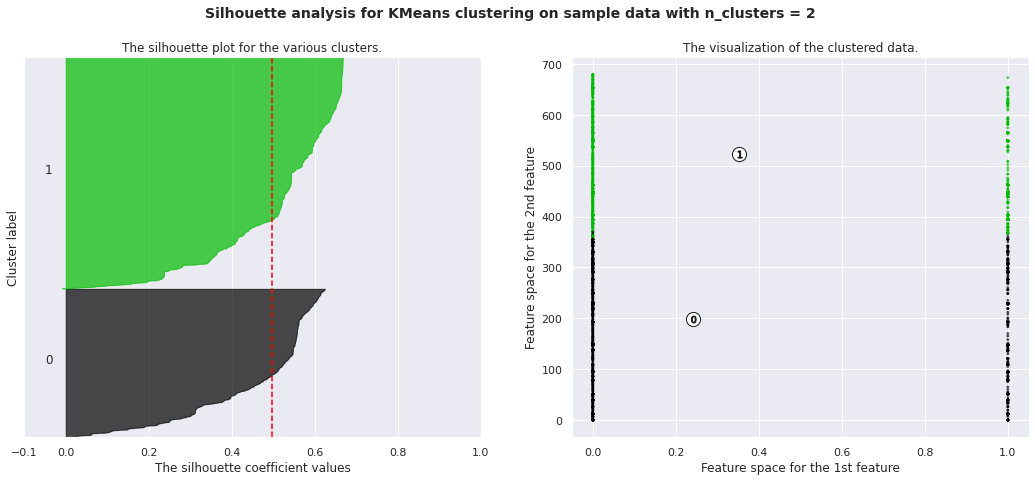

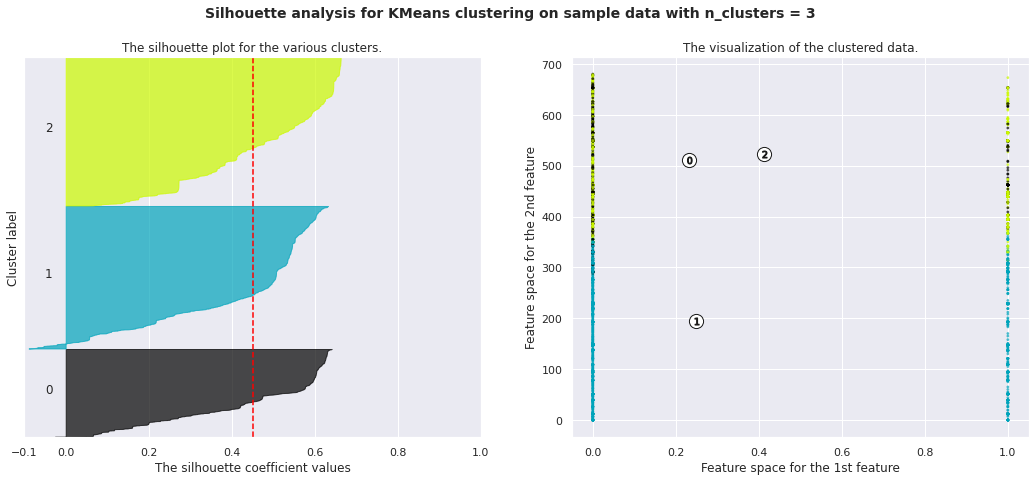

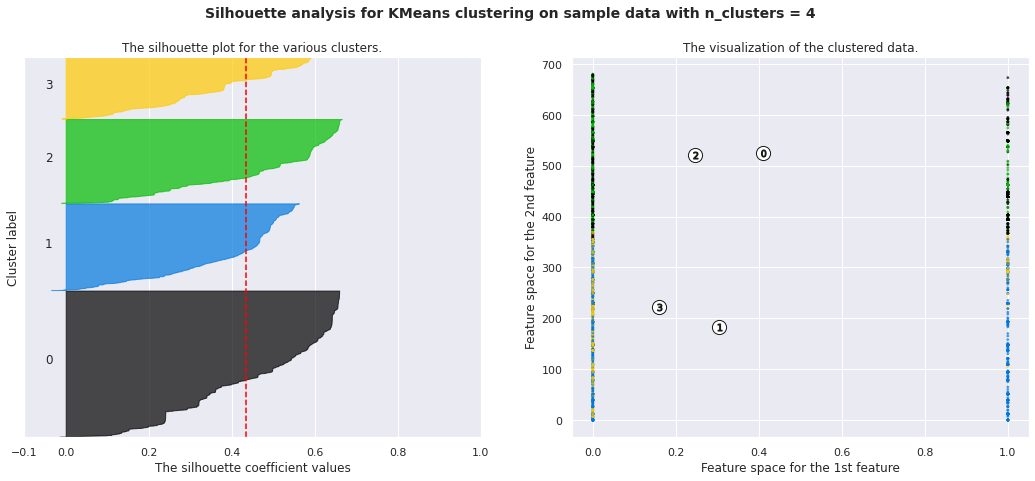

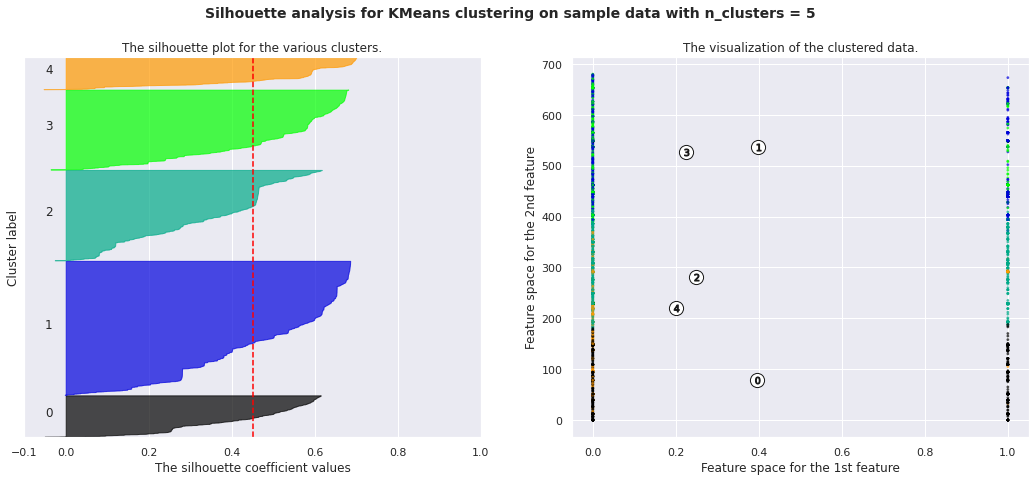

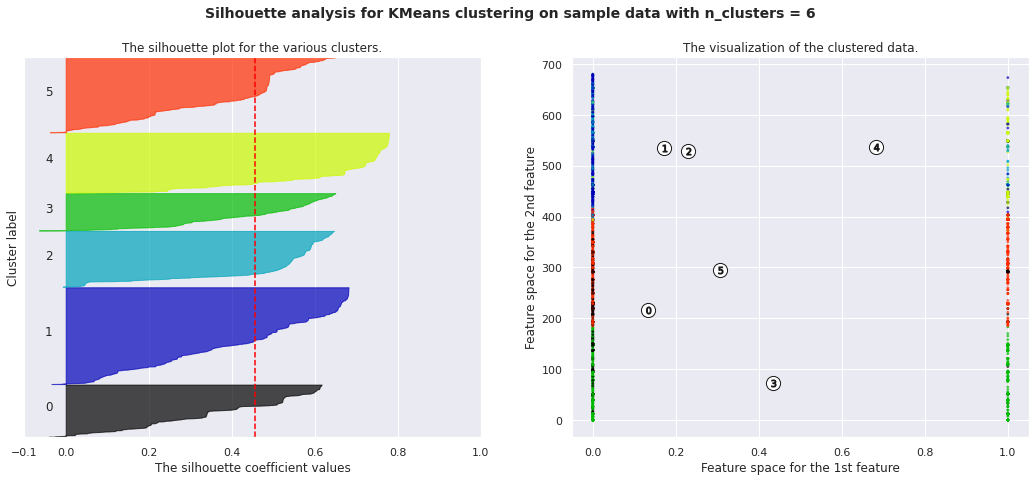

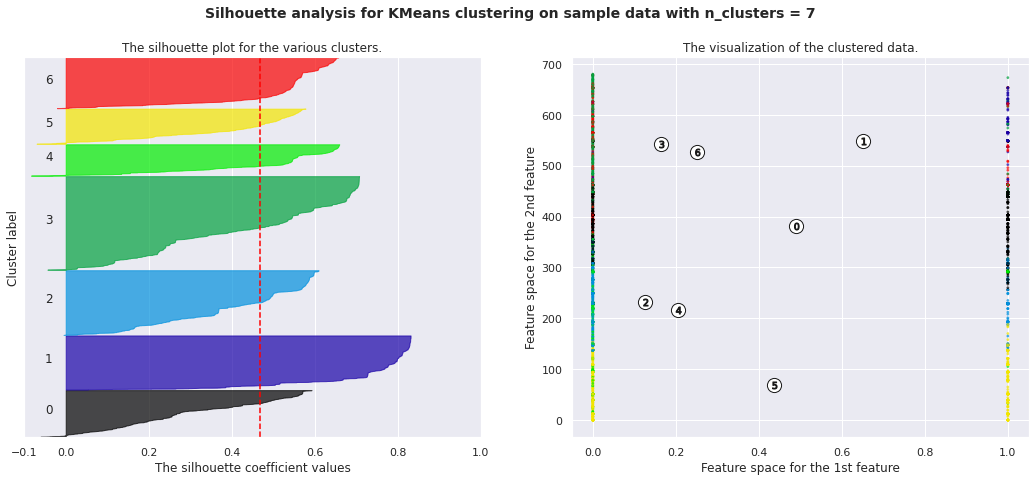

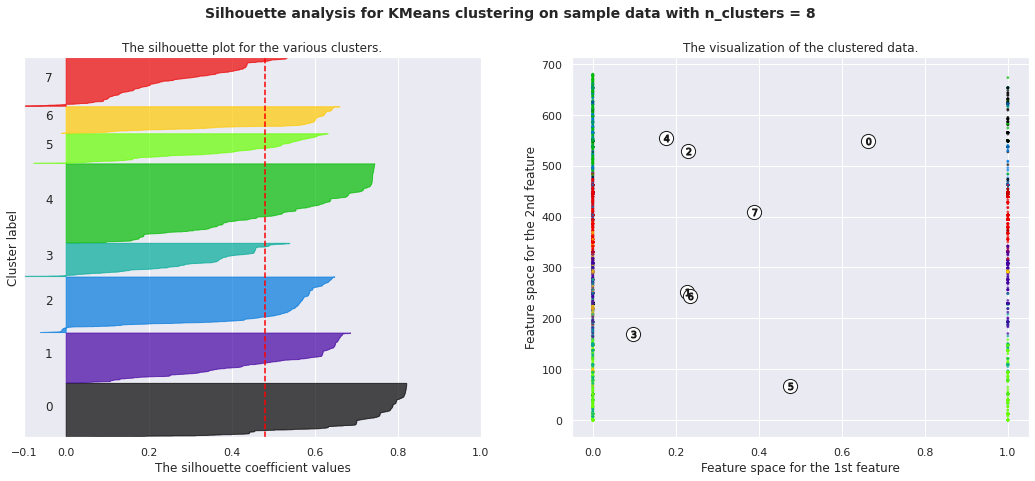

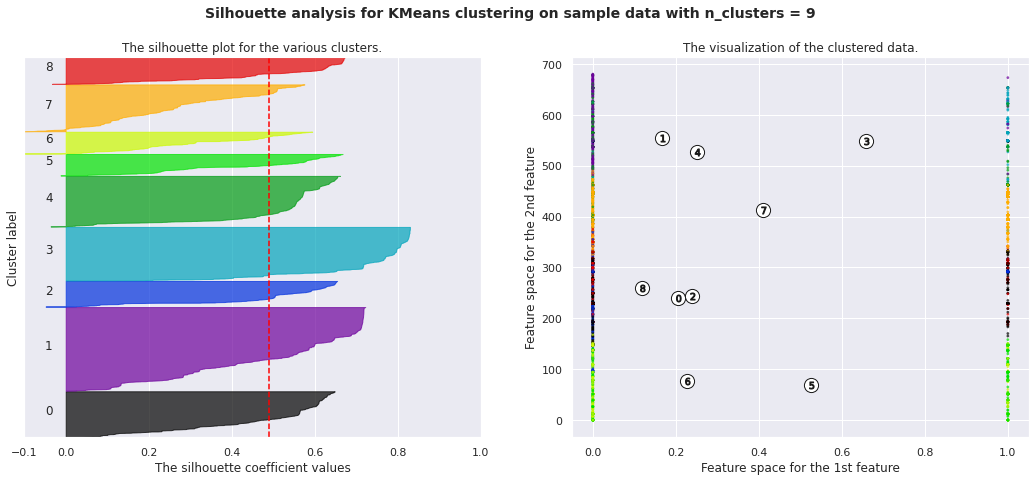

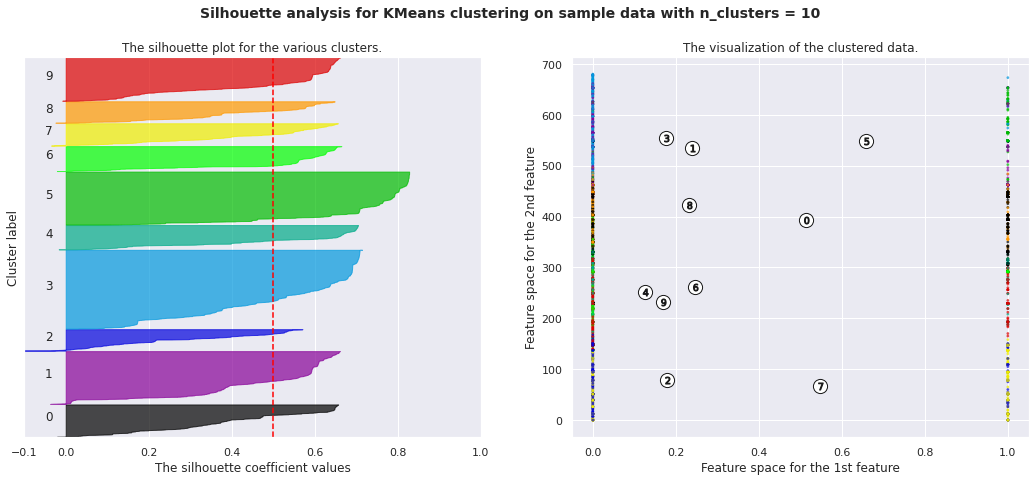

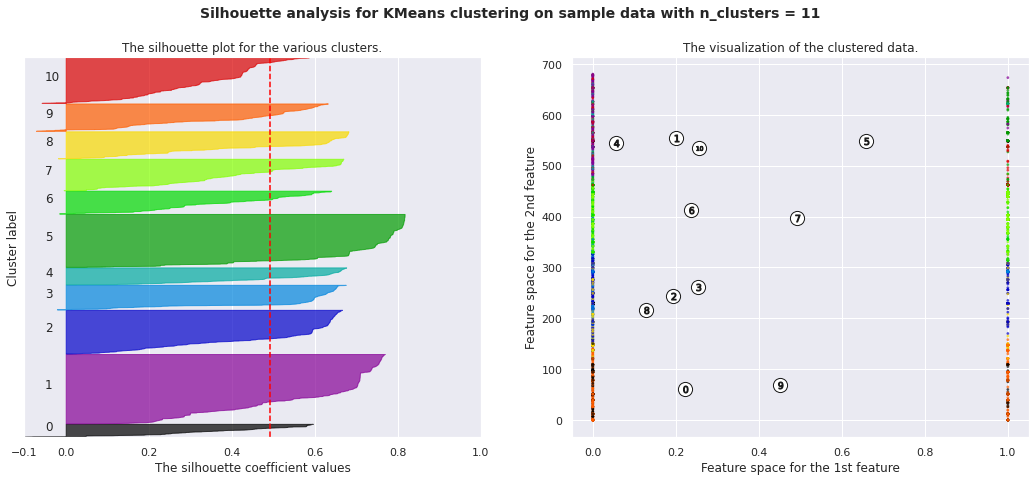

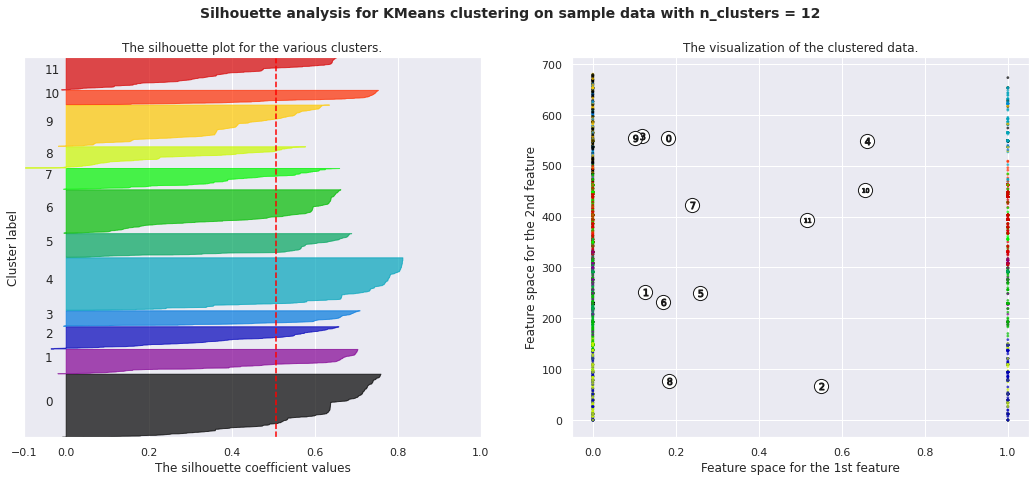

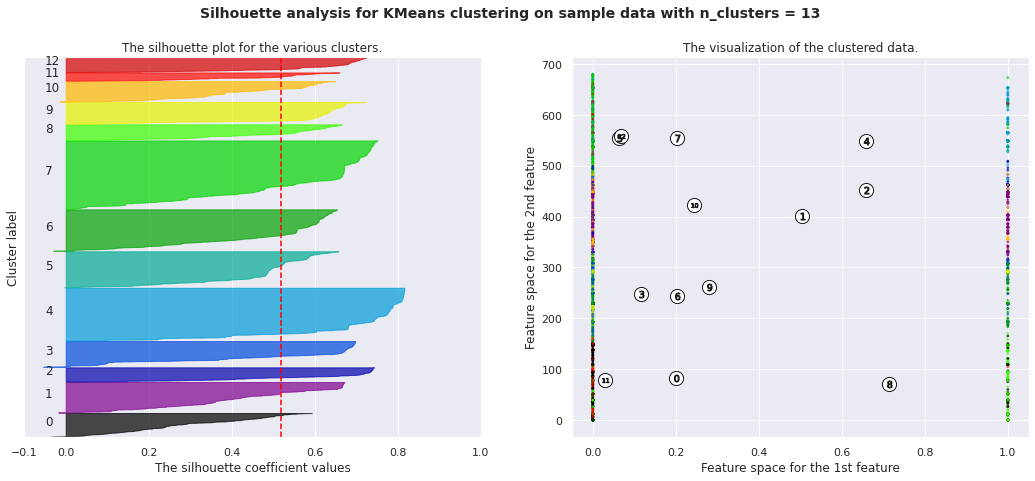

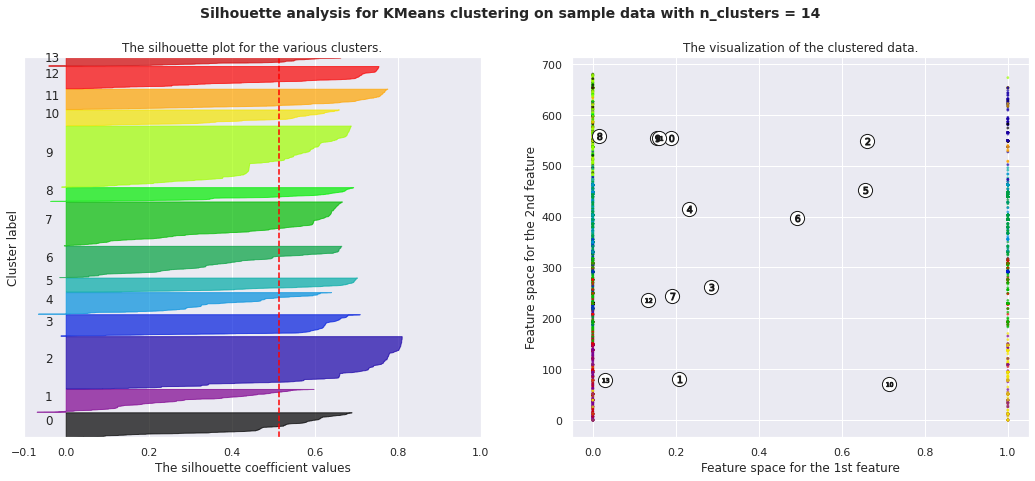

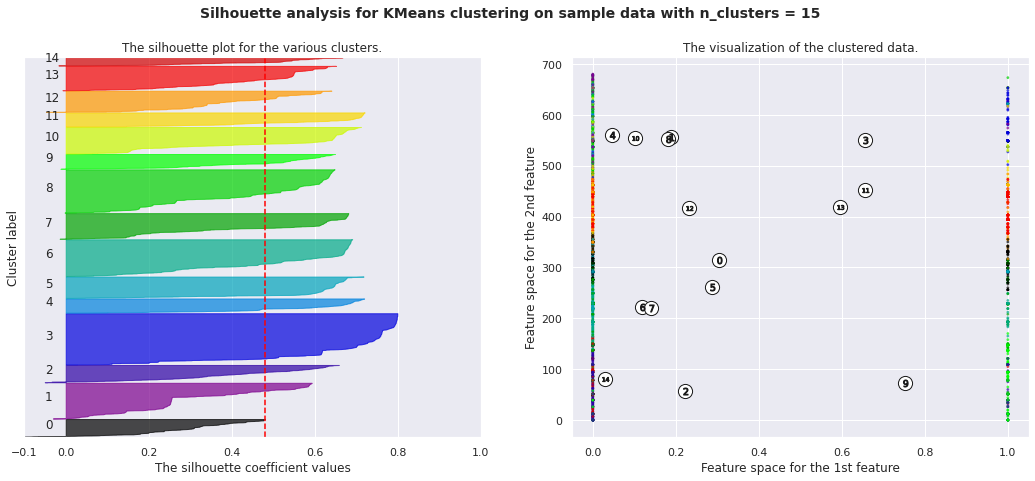

In [191]:
# Calculating and visualizing the clusters and the silhouette scores for each cluster.
range_n_clusters = [i for i in range(2,16)]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(new_data) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(new_data)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(new_data, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(new_data, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(new_data.iloc[:, 0], new_data.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

# Elbow Method

Elbow method is used to determine the optimal number of clusters that we can form with the given dataset.

In [192]:
# Scaling the dataset to perform elbow method.
scaler = MinMaxScaler()
sc = scaler.fit_transform(new_data)
Netflix = pd.DataFrame(sc, columns=list(new_data.columns))
X = Netflix
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(Netflix).score(Netflix) for i in range(len(kmeans))]


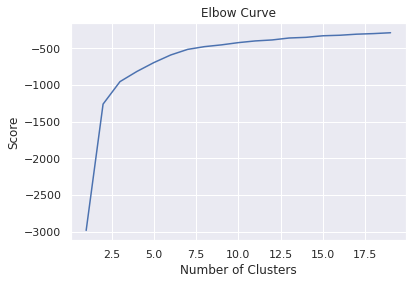

In [193]:
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

**Findings** The above graph clearly shows that the elbow is formed at the point where clusters are **3**. We shall be investigating further more with dendogram for the same.

# Hierarchical Clustering

A dendrogram is a tree-like diagram that records the sequences of merges or splits.More the distance of the vertical lines in the dendrogram, more the distance between those clusters.

We can set a threshold distance and draw a horizontal line (Generally, we try to set the threshold in such a way that it cuts the tallest vertical line).

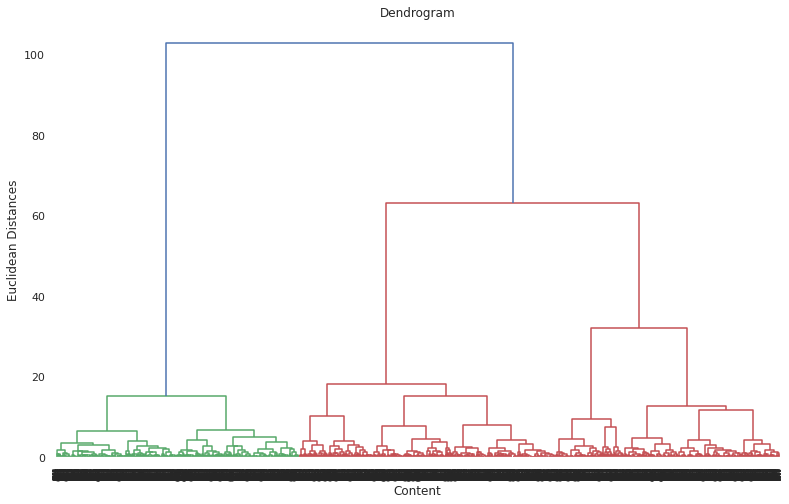

In [213]:
# Getting a dendogram for finding out the optimal numbers of clusters.
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(Netflix, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Content')
plt.ylabel('Euclidean Distances')
plt.show()

**Findings** Here the largest vertical line can be observed at the left of the diagram. When this vertical line is cut to the lowest part before cutting any horizontal line , we get 3 main clusters.

We got **3 Clusters** in both **Elbow method** and **Dendogram**, hence we shall proceed with the same. 

In [196]:
#Fitting the kmeans model with 3 clusters on the vectorized text.
kmeans = KMeans(n_clusters=3)
kmeans.fit(vectorized_text)
y_kmeans= kmeans.predict(vectorized_text)

In [197]:
# Adding a new column 'cluster' to the previous dataset, which we obtained by clustering the vectorized text.
len(kmeans.labels_)
Netflix['cluster'] = kmeans.labels_
Netflix.head()

,type,country,release_year,rating,listed_in,year_added,cluster
0,1.0,0.057353,0.989583,0.571429,0.812245,0.923077,1
1,0.0,0.452941,0.947917,0.571429,0.630612,0.615385,0
2,0.0,0.557353,0.895833,0.357143,0.683673,0.769231,0
3,0.0,0.807353,0.875000,0.285714,0.095918,0.692308,2
4,0.0,0.807353,0.864583,0.285714,0.597959,0.923077,2


In [ ]:
# This code will create CSV files for each type of cluster, where it will hold the title and the description of the movie/tv_shows.

# clusters = Netflix.groupby('cluster')    
# for cluster in clusters.groups:
#     f = open('cluster'+str(cluster)+ '.csv', 'w') # create csv file
#     data = clusters.get_group(cluster)[['title','overview']] # get title and overview columns
#     f.write(data.to_csv(index_label='id')) # set index to id
#     f.close()

In [210]:
# Getting the cluster centroids and the top keywords/features associated with those clusters.
print("Cluster centroids: \n")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(3):
    print("Cluster %d:" % i)
    for j in order_centroids[i, :10]: #print out 10 feature terms of each cluster
        print (' %s' % terms[j])
    print('-----------------------------------------------------------')

Cluster centroids: 

Cluster 0:
 drama
 movi
 intern
 comedi
 independ
 romant
 young
 woman
 horror
 love
-----------------------------------------------------------
Cluster 1:
 tv
 show
 intern
 crime
 british
 romant
 kid
 seri
 korean
 spanishlanguag
-----------------------------------------------------------
Cluster 2:
 documentari
 action
 adventur
 famili
 standup
 children
 intern
 movi
 kid
 world
-----------------------------------------------------------


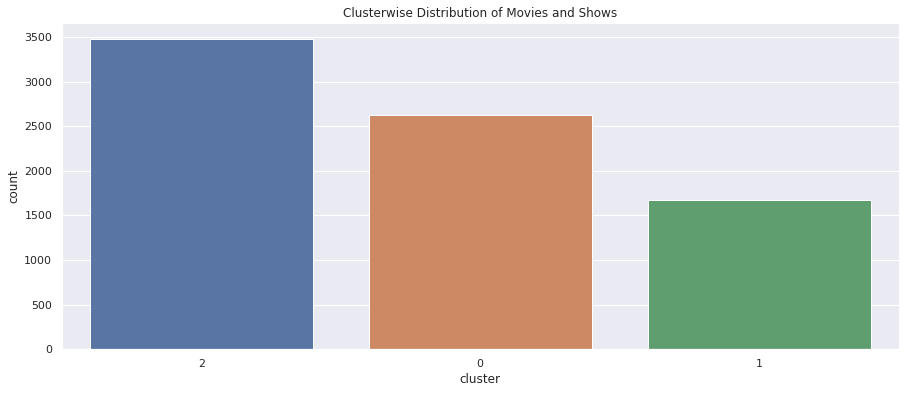

In [198]:
# Ploting the distribution of the moveis and Tv Shows from the clusters we just formed.
plt.figure(figsize=(15,6))
plt.title('Clusterwise Distribution of Movies and Shows')
sns.countplot(x='cluster',data=Netflix,order=Netflix['cluster'].value_counts().index[:4])
plt.show()



---



---



---



---



# Conclusions and Findings

**EDA**

* There were only 4 features which were missing some values out of which **director** was the one with most number of missing values.

* The most number of content that was added on the platfom was in 2019 which was above 2000 shows/movies. 2020 and 2018 happened to be the following years with really high amount of content publishing.

* There are twice as much movies than TV shows on the platform. 30.86% TV shows and 69.14% Movies. We have about 2500+ TV shows and 5000+ Movies on the platform.

* Major countries publishing on the platform are US, India, UK, Japan and South Korea.

* Out of all the top publishers on the platform, UK, Japan and South Korea are the countries who are publishing more TV-Shows than Movies. The opposite is true for the rest of the publishing countries.

* Along the years, the content being published on the platform started increasing from 2016 and kept exponentially growing till 2020.

* The publishing of TV shows increased in the year 2019 whereas the publishing of movies have went down. We can say the platform is focusing on the tv-shows increasingly. 

* The major generes for the content on the platform are **International Movies, Dramas, Comedies and International TV- Shows.**

* We see that most of the content has been published at the end of the year, which happens to be the period of holiday.

* Most of the content present on the platform is for mature audience only, which may be a bit unwelcoming to younger viewers.

**CLUSTERING AND LEARNING**

* I experimented with Silhouette scores, Elbow Method and Dendograms to figure out the optimal number of cluster for the dataset. The optimal number of clusters for the dataset is **3**.

* I used Kmeans clustering with 3 clusters as the starting point for the vectorized text dataset.

* There are the keywords/topics that the clusters prominently have.

**Cluster 0:**
 drama
 movi
 intern
 comedi
 independ
 romant
 young
 woman
 horror love

**Cluster 1:**
 tv
 show
 intern
 crime
 british
 romant
 kid
 seri
 korean
 spanishlanguag

**Cluster 2:**
 documentari
 action
 adventur
 famili
 standup
 children
 intern
 movi
 kid
 world